<a href="https://colab.research.google.com/gnthub/davidelavarga/03MIAR-Algoritmos-de-Optimizacion/blob/main/Seminario_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Algoritmos de optimización - Seminario<br>

Nombre y Apellidos: David de la Varga del Caño <br>
Url: https://github.com/davidelavarga/03MIAR-Algoritmos-de-Optimizacion/blob/main/Seminario_Algoritmos.ipynb<br>
Problema:

> 3.  Combinar cifras y operaciones

## Descripción del problema:

Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(\*) y división(/). Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad
dada.

Un ejemplo sería para obtener el 4:

```
4+2-6/3*1 = 4
```

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:

- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?

  Según las condiciones del problema el máximo valor que se puede obtener es 77 y el mínimo -69.

- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo?
  Si, es posible encontrar cada valor entero del intervalo [-69, 77]


#### (\*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>

Estamos tratando un problema donde tenemos 13 elementos, 4 correspondientes a los signos de operaciones y 9 a los dígitos. No tendremos en cuenta las retricciones de orden ni repetición por lo que estamos ante un problema de variación con repetición, donde `n = 13` y `k = 9` (longitud de la expresión a construir):

```
13^9 = 10.604.499.373 posibilidades
```

**10.000 millones de posibilidades**

Cabe destacar, que saltandonos las restricciones muchos de los resultados no tienen sentido, como por ejemplo dos sumas secuenciales (`++`)


#### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?

Ahora bien, si tenemos en cuenta las restricciones, la dimensión del problema se reduce bastante, pero aún así sigue siendo enorme.

Teniendo en cuenta el orden y la repetición tenemos dos frentes:

1. Conteo de operaciones. Puesto que no se pueden repetir el número de posibilidades es:
   ```
   4! = 24
   ```
2. Conteo de digitos numericos. Estamos ante un problema donde tenemos `n = 9` opciones de las que elegimos `k = 5`. Es una variación sin repetición
   ```
   n! / (n - k)! = 9! / 4! = 15.120
   ```

Una vez sabemos el número posibilidades que tenemos en cada frente, falta combinarlos. Para ello multiplicamos ambos conteos:

```
4! * 9! / 4! = 9! = 362.880
```

Hemos reducido el problema en una magnitud considerable (~10.000 M posibilidades)


#### (\*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


El algoritmo de ramificación y poda se suele representar con un arbol de búsqueda. En este caso cada nodo tiene una lista de 5 elementos candidatos a la solucion. A los cuales se les aplica una funcion de evaluacion u otra dependiendo de si es un número positivo o negativo.

En caso de ser positivo se evaluará en ``x1*x2+x3/x4-x5`` y si es negativo en ``x1/x2-x3*x4+x5``

Aplicaremos la poda del arbol comprobando si:
- Si el numero objetivo es positivo, evaluaremos ``x1*x2+x3``. Si es menor que el número objetivo podamos
- Si el numero objetivo es negativo, evaluaremos ``x1/x2-x3``. Si es mayor que el número objetivo podamos 

#### Según el modelo para el espacio de soluciones<br>

(\*)¿Cual es la función objetivo?
- ``x1*x2+x3/x4-x5`` para busquedas `>=0`
- ``x1/x2-x3*x4+x5`` para busquedas `<0`

Las restricciones estan explicadas en el apartado anterior


(\*)¿Es un problema de maximización o minimización?
 Se intenta minimizar el espacio de búsqueda descartando aquellas soluciones que no cumplen las restricciones

#### Diseña un algoritmo para resolver el problema por fuerza bruta


En el siguiente algoritmo por fuerza bruta voy a probar todas las posibles combinaciones hasta dar con el objetivo. <br>
Para ello me sirvo de la librería `itertools` y la función `permutations`, la cual genera todas las posibles permutaciones<br>
de la lista que recibe como argumento.<br>

> A partir de ahora, todas las funciones las nombraré con el prefijo `cyo` acrónimo de "cifras y operaciones"


In [92]:
from time import time

# Implemento un decorador para medir el tiempo de ejecucion de cada funcion
def timer(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.6f} sec')
        return result
    return wrap_func

In [93]:
from itertools import permutations

@timer
def cyo_fuerza_bruta(number):
    for n in list(permutations([i for i in range(1, 10)], 5)):
        for op in list(permutations(["+", "-", "/", "*"])):
            exp = f"{n[0]}{op[0]}{n[1]}{op[1]}{n[2]}{op[2]}{n[3]}{op[3]}{n[4]}"
            try:
                if eval(exp) == number:
                    return exp 
            except Exception:
                # Ignoramos cualquier error puesto que hay muchas expresiones que seran erróneas
                pass

print(cyo_fuerza_bruta(21))

Function 'cyo_fuerza_bruta' executed in 0.102997 sec
1-4+6/2*8


#### Calcula la complejidad del algoritmo por fuerza bruta


Puesto que estamos iterando sobre todas las posibles permutaciones de una lista de 9 números y una lista de 4 operaciones: <br>
- Lista de números: ``n`` <br>
- Lista de operaciones: ``op`` <br>

```
O(n!op!)
```

#### (\*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta


A continuación voy a implementar un algoritmo de backtraking con ramificación y poda. Como he mencionado antes el algoritmo esta implementado como un arbol de busqueda. <br>
La clave del algoritmo reside en que si el número que queremos calcular es:
- Positivo (o 0) la expresión que se utilizará será: ``x1*x2+x3/x4-x5``. Donde podemos identificar dos partes de la expresión:
    - La suma y multiplicación que permite buscar un número suficientemente alto al que podamos sumar la segunda parte de la expresión
    - La división y la resta, aportarán una cantidad pequeño hasta llegar al objetivo
- Negativo, sucede al inverso que en el caso anterior: ``x1/x2-x3*x4+x5``
    - La división y la resta: obtiene un número suficientemente pequeño al cual restaremos la segunda parte de la expresión
    - La multiplicación y la suma: la cantidad aqui obtenida será restada y al ser de magnitud mayor se convertirá en número negativo


In [52]:
def cyo_eval_exp_pos(sol, n):
    # Evalua la función contra el número positivo
    expresion = f"{sol[0]}*{sol[1]}+{sol[2]}/{sol[3]}-{sol[4]}"
    if eval(expresion) == n:
        return expresion

def cyo_eval_exp_neg(sol, n):
    # Evalua la función contra el número negativo
    expresion = f"{sol[0]}/{sol[1]}-{sol[2]}*{sol[3]}+{sol[4]}"
    if eval(expresion) == n:
        return expresion

def cyo_promising_sol_pos(sol, n):
        # Para números positivos, si todo lo que aumenta el numero objetivo
        # es mayor que el numero es solución prometedora
        return eval(f"{sol[0]}*{sol[1]}+{sol[2]}") > n

def cyo_promising_sol_neg(sol, n):
        # Para números negativos, si todo lo que decrementa el numero es mayor que el numero,
        # es solucion prometedora Solo es prometedora para numeros negativos si la primera mitad 
        return eval(f"{sol[0]}/{sol[1]}-{sol[2]}") > n

In [78]:
# No añado el decorador puesto que al ser recursiva llena la salida por consola
def cyo_branching_and_pruning(number, candidate, sol=[0 for _ in range(5)], checks=[], problem_size=10, show_sol=True):
    # Elegimos la funcion de evaluacion y promesa
    eval_fn = cyo_eval_exp_pos
    promising_fn = cyo_promising_sol_pos
    if number < 0:
        eval_fn = cyo_eval_exp_neg
        promising_fn = cyo_promising_sol_neg
    
    promising = True
    for i in range(problem_size): # Numeros del 1 al 9
        if i not in checks:
            sol[candidate] = i + 1
            if candidate == 2:
                # Comprobamos si promete cuando otenemos los 3 primeros candidatos
                promising = promising_fn(sol, number)
            if promising:
                if candidate != len(sol)-1:
                    checks.append(i)
                    cyo_branching_and_pruning(number, candidate+1, sol, checks, show_sol=show_sol)
                    checks.remove(i)
                else:
                    # Evaluamos la expresion cuando tenemos una expresion completa
                    exp = eval_fn(sol, number)
                    if exp and show_sol:
                        print(exp)

In [79]:
cyo_branching_and_pruning(-14, 0)

2/1-3*7+5
2/1-4*6+8
2/1-6*4+8
2/1-7*3+5
3/1-4*6+7
3/1-6*4+7
4/1-3*8+6
4/1-8*3+6
4/2-3*7+5
4/2-7*3+5
5/1-3*7+2
5/1-3*9+8
5/1-4*7+9
5/1-7*3+2
5/1-7*4+9
5/1-9*3+8
6/1-3*8+4
6/1-3*9+7
6/1-4*7+8
6/1-7*4+8
6/1-8*3+4
6/1-9*3+7
6/2-3*7+4
6/2-3*8+7
6/2-3*9+10
6/2-4*5+3
6/2-5*4+3
6/2-7*3+4
6/2-8*3+7
6/2-9*3+10
6/3-2*10+4
6/3-10*2+4
7/1-3*9+6
7/1-3*10+9
7/1-4*6+3
7/1-5*6+9
7/1-6*4+3
7/1-6*5+9
7/1-9*3+6
7/1-10*3+9
8/1-3*9+5
8/1-4*6+2
8/1-4*7+6
8/1-6*4+2
8/1-7*4+6
8/1-9*3+5
8/2-4*7+10
8/2-7*4+10
8/4-3*6+2
8/4-3*7+5
8/4-6*3+2
8/4-7*3+5
9/1-3*10+7
9/1-4*7+5
9/1-5*6+7
9/1-6*5+7
9/1-7*4+5
9/1-10*3+7
9/3-4*6+7
9/3-6*4+7
10/2-3*8+5
10/2-3*9+8
10/2-4*5+1
10/2-4*6+5
10/2-4*7+9
10/2-5*4+1
10/2-6*4+5
10/2-7*4+9
10/2-8*3+5
10/2-9*3+8
10/5-3*6+2
10/5-4*6+8
10/5-6*3+2
10/5-6*4+8


#### (\*)Calcula la complejidad del algoritmo


El algoritmo de ramificación y poda es una mejora al algoritmo de backtraking <br>
Bracktraking hace una busqueda exaustiva por todos los nodos del árbol por lo que su complejidad es ``O(k^n)``, inferior a la fuerza bruta,
donde k es el número de llamadas a la función recursiva y n el número de elementos, en nuestro caso sería similar a: ``O(k^10)``

Pero aplicando ramificación y poda con el criterio anteriormente descrito la complejidad se reduce 

#### Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

- https://docs.python.org/3/library/itertools.html#itertools.permutations
- https://www.geeksforgeeks.org/timing-functions-with-decorators-python/

#### Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño


El algoritmo propuesto está limitado a buscar una solucion de combinación de 5 numeros y 4 operaciones únicamente. Podríamos intentar mejorarlo soportando soluciones de más longitud donde de alguna forma automática se agruparan las operaciones que aumentan el número objetivo (+ y *) y por otro lado las que lo disminuyen (- y /). De esta forma podriamos aplicar las mismas restricciones para la poda con soluciones de más de 5 números.

La variación más directa del problema sería utilizar un rango de números mayor, por ejemplo, del 1 al 100 y del 1 al 1000. <br>
Con estos tamaños de entrada ver si el algorimo escala correctamente en tiempo de ejecución.

In [88]:
import time

sizes = [10, 100, 500, 1000, 10000, 100000]
times = []
for i in sizes:
    t1 = time.time()
    cyo_branching_and_pruning(i, 0, problem_size=i, show_sol=False)
    times.append(time.time() - t1)

In [90]:
times

[0.022991180419921875,
 0.5750322341918945,
 2.854004383087158,
 5.708971977233887,
 58.942023038864136,
 592.6565914154053]

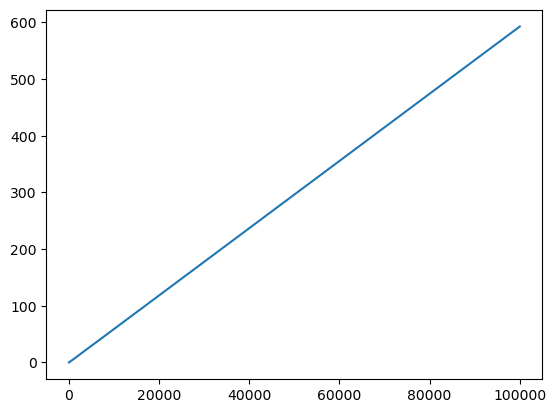

In [89]:
from matplotlib import pyplot as plt

plt.plot(sizes, times)
plt.show()

Podemos observar un crecimiento practicamente lineal hasta tamaños de 100.000 elementos.